# Naive Bayes implementation

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data  = np.array ([
[1, 'Sunny', 'Hot', 'High', 'No'],
[2, 'Sunny', 'Hot', 'High', 'No'],
[3, 'Overcast', 'Hot', 'High', 'Yes'],
[4, "Rainy", 'Mild', 'High', 'Yes'],
[5,'Rainy', 'Cool', 'Normal', 'Yes'],
[6, "Rainy", 'Cool', 'Normal', 'No'],
[7, 'Overcast', 'Cool', 'Normal', 'Yes'],
[8, 'Sunny', 'Mild', 'High', 'No'],
[9, 'Sunny', 'Cool', 'Normal', 'Yes'],
[10, 'Rainy', 'Mild', 'Normal', 'Yes']

])


In [2]:
x = data[:,1:4] #features
y = data[:,4] # labels

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [3]:
def calculate_probabilities(data, label_column):
  probabilities = {}
  labels, counts = np.unique(data[:,label_column], return_counts=True)
  total_samples= len(data)
  for label,count in zip(labels,counts):
    probabilities[label]= count/total_samples

  return probabilities

In [4]:
def train_naive_bayes(x,y):
  num_features = x.shape[1]
  unique_labels = np.unique(y)
  probabilities = {}

  for label in unique_labels:
    label_indices = np.where(y==label)[0]
    label_data = x[label_indices]

    probabilities[label] = []
    for i in range(num_features):
      feature_values, counts = np.unique(label_data[:,i],return_counts=True)
      feature_probabilities = dict(zip(feature_values,counts/len(label_data)))
      probabilities[label].append(feature_probabilities)

    return probabilities

In [5]:
def predict_naive_bayes(instance, probabilities):
  predicted_label= None
  max_probability = -1

  for label , label_probabilities in probabilities.items():
    instance_probability = 1.0
    for i,value in enumerate(instance):
      if value in label_probabilities[i]:
        instance_probability *= label_probabilities[i][value]
      else:
        instance_probability = 0

    if instance_probability > max_probability:
      max_probability = instance_probability
      predicted_label = label

  return predicted_label

In [6]:
probabilities = train_naive_bayes(x,y)

test_instance = ['Sunny', 'Hot', 'High']

prediction = predict_naive_bayes(test_instance,probabilities)

print(f"The predicted label for the instance {test_instance} is: {prediction}")

The predicted label for the instance ['Sunny', 'Hot', 'High'] is: No


# K-mean implementation

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def kmeans(x,k,max_iterations=100):
  centroids = x[np.random.choice(x.shape[0], k , replace=False)]

  for _ in range(max_iterations):
    distances = np.linalg.norm(x[:,np.newaxis] - centroids, axis = 2)
    labels = np.argmin(distances, axis=1)

    for i in range(k):
      centroids[i] = np.mean(x[labels == i], axis = 0)

  return labels, centroids

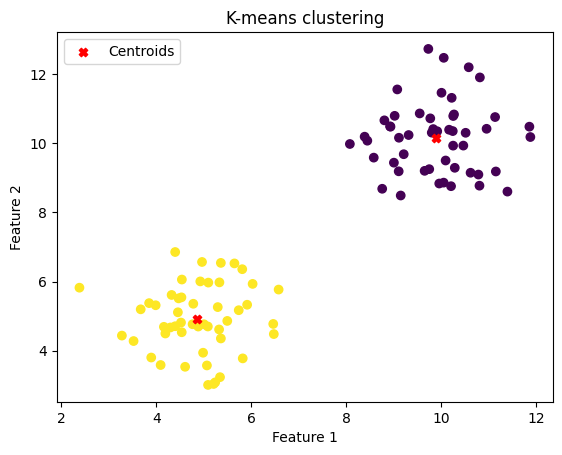

In [13]:
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=5, scale=1, size=(50,2)),
                       np.random.normal(loc=10, scale=1, size=(50,2))])

k = 2
labels, centroids = kmeans(data, k)

plt.scatter(data[:,0], data[:,1], c=labels, cmap = 'viridis', marker='o')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', label='Centroids')
plt.title('K-means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()